In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Membaca deskripsi data

In [2]:
data_desc = pd.read_csv('heart_failure_clinical_records_dataset_decs.csv')
data_desc

Columns  \
0                        age   
1                    anaemia   
2   creatinine_phosphokinase   
3                   diabetes   
4          ejection_fraction   
5        high_blood_pressure   
6                  platelets   
7           serum_creatinine   
8               serum_sodium   
9                        sex   
10                   smoking   
11                      time   
12               DEATH_EVENT   

                                          Description  
0                                  age of the patient  
1           decrease of red blood cells or hemoglobin  
2                level of the CPK enzyme in the blood  
3                         if the patient has diabetes  
4   percentage of blood leaving the heart at each ...  
5                     if the patient has hypertension  
6                              platelets in the blood  
7              level of serum creatinine in the blood  
8                  level of serum sodium in the blood  
9                                        woman or man  
10                       if the patient smokes or not  
11                                   follow-up period  
12    if the patient died during the follow-up period

Membaca dataset

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

Exploratory Data Analysis (EDA)

In [4]:
# mendapatkan ukuran kolom dan baris

data.shape

(299, 13)

In [5]:
# mengetahui info mengenai dataset

data.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [6]:
# mencari duplikasi pada dataset

data.duplicated().sum()

0

In [7]:
# mendeskripsikan dataset secara singkat

data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [8]:
# menampilkan jumlah data yang unik dari setiap kolom

data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
# menampilkan deskripsi data secara transposisi

data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [10]:
# melihat data unik pada kolom anaemia

data['anaemia'].unique()

array([0, 1], dtype=int64)

In [11]:
# melihat data unik dari kolom diabetes

data['diabetes'].unique()

array([0, 1], dtype=int64)

In [12]:
# melihat data unik yang ada pada kolom death event

data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [13]:
# melihat tipe data pada setiap kolom di dataset

data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<Axes: >

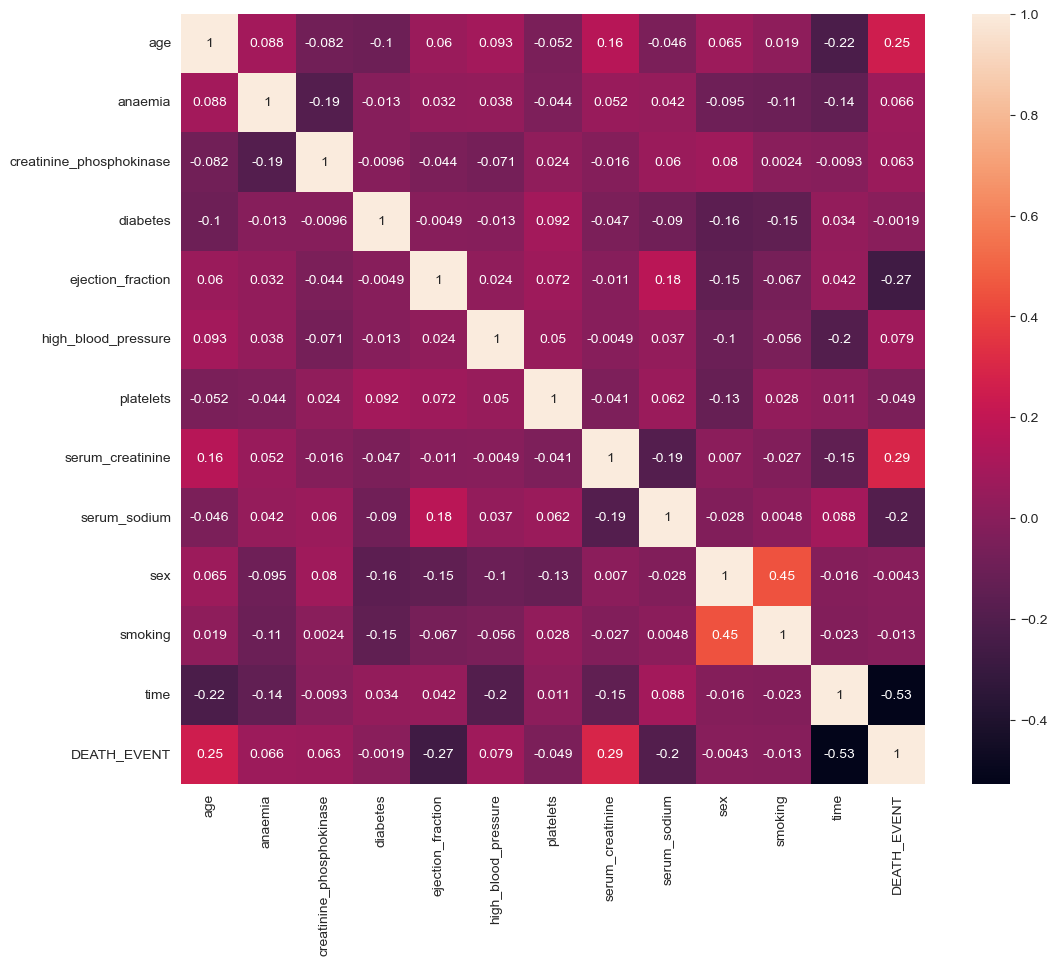

In [14]:
# menampilkan korelasi antar kolom dengan range -1 sampai 1
# 1 = korelasi positif sempurna
# -1 = korelasi negatif sempurna
# 0 = tidak ada korelasi

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

Berdasarkan korelasi matrix yang ada, dapat dilihat bahwa kolom yang berpengaruh dengan kolom lain adalah:
1. age
2. DEATH_EVENT
3. serum_creatinine
4. sex
5. smoking
6. ejection_fraction
7. time

<Axes: >

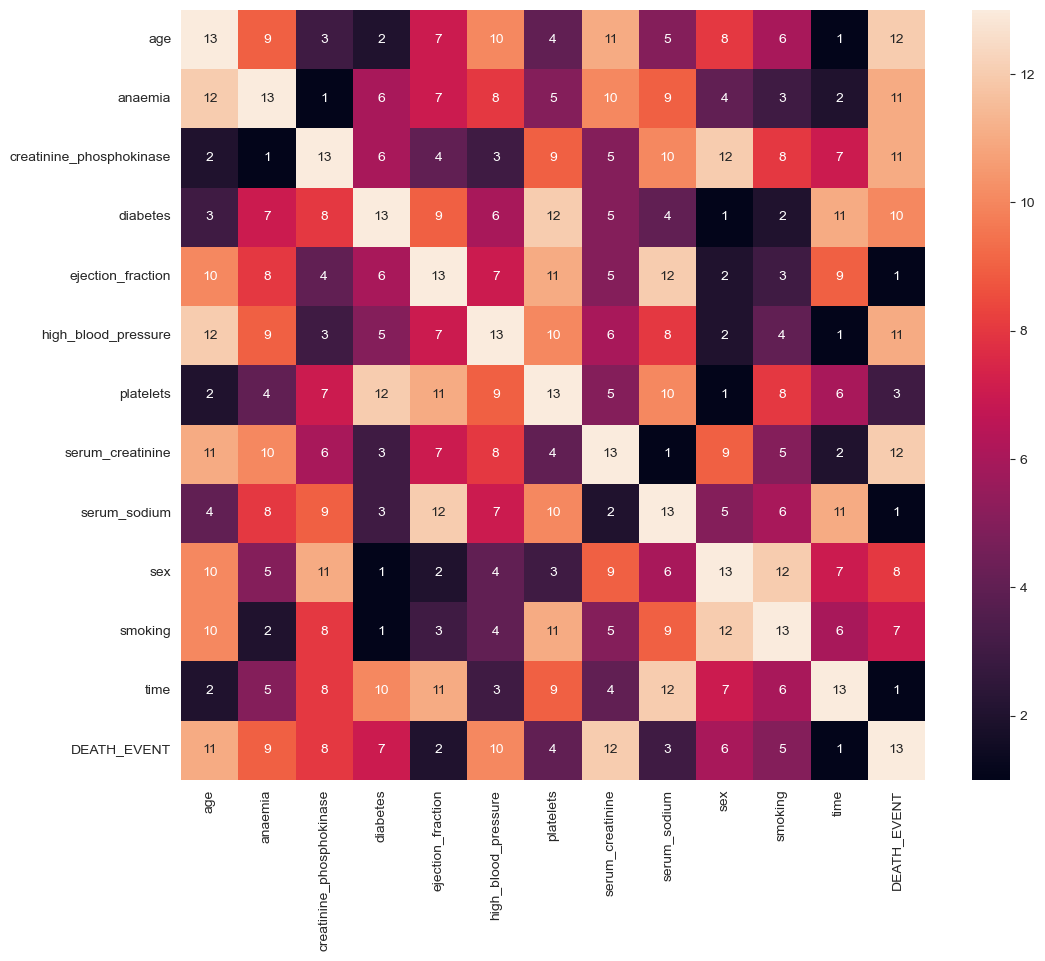

In [15]:
# menampilkan korelasi dengan cara menghitung peringkat korelasi dari setiap kolom dalam dataset

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr().rank(axis='columns'), annot=True)

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

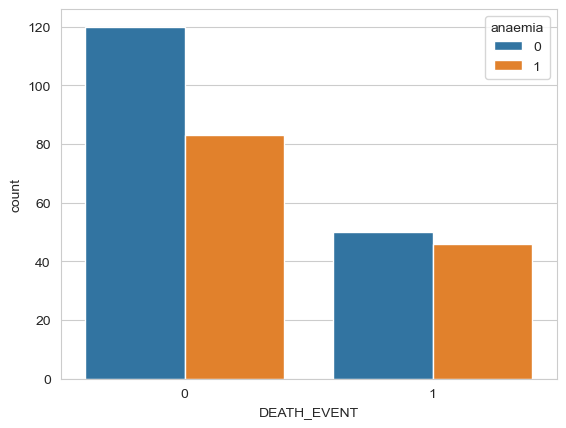

In [16]:
# menghitung jumlah kematian dengan hue anaemia

sns.countplot(x=data['DEATH_EVENT'], hue=data['anaemia'])

<Axes: xlabel='smoking', ylabel='count'>

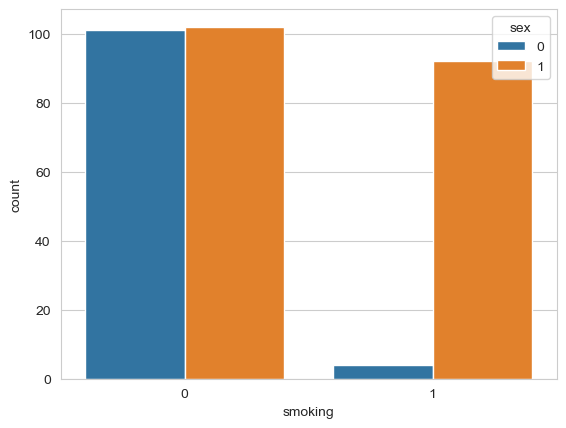

In [17]:
# menghitung jumlah smoking dengan hue sex

sns.countplot(x=data['smoking'], hue=data['sex'])

<Axes: xlabel='smoking', ylabel='count'>

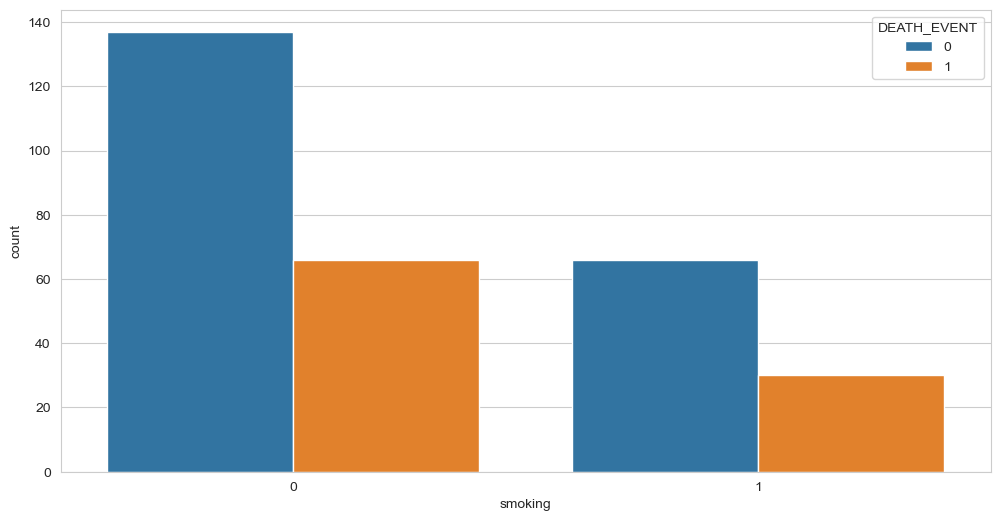

In [18]:
# menghitung jumlah smoking dengan hue death_event

plt.figure(figsize=(12, 6))
sns.countplot(x=data['smoking'], hue=data['DEATH_EVENT'])

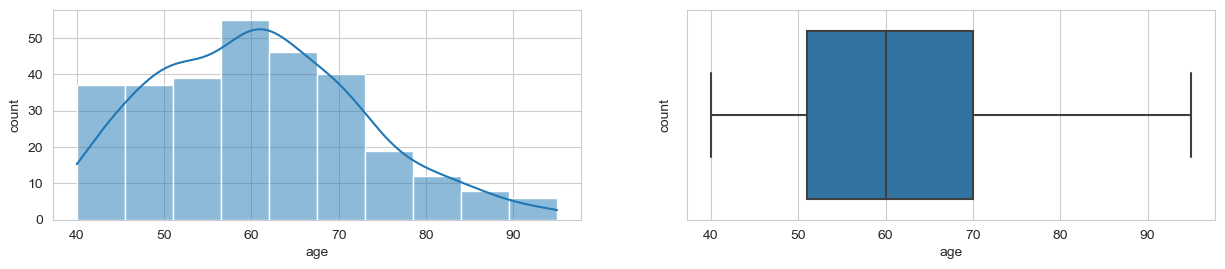

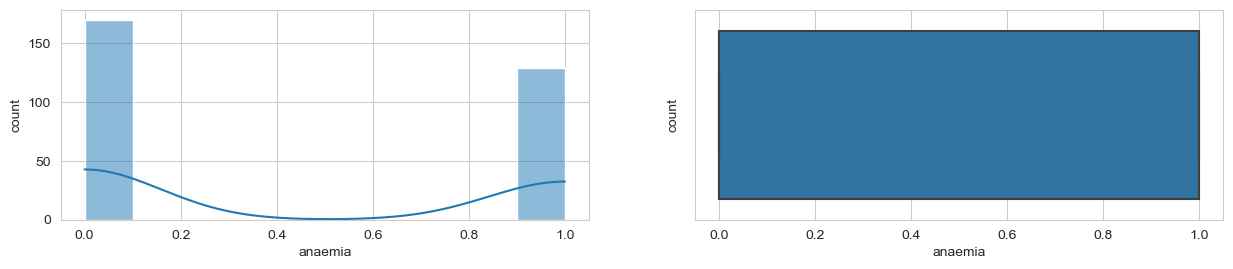

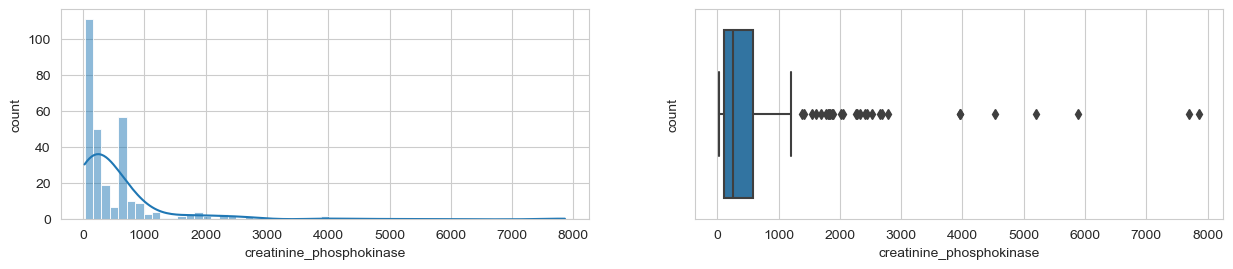

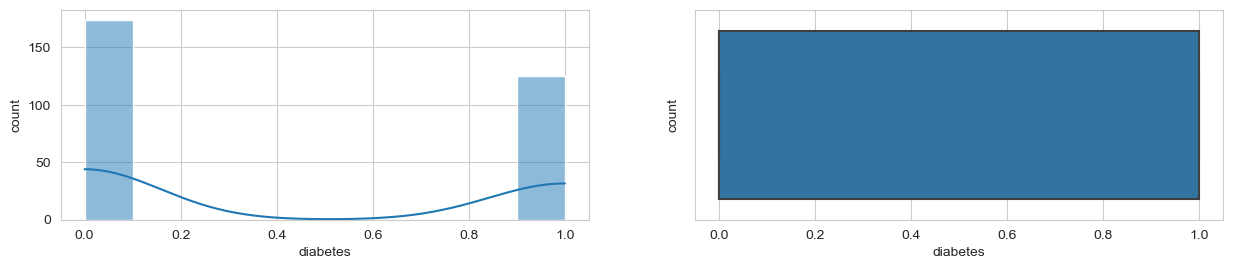

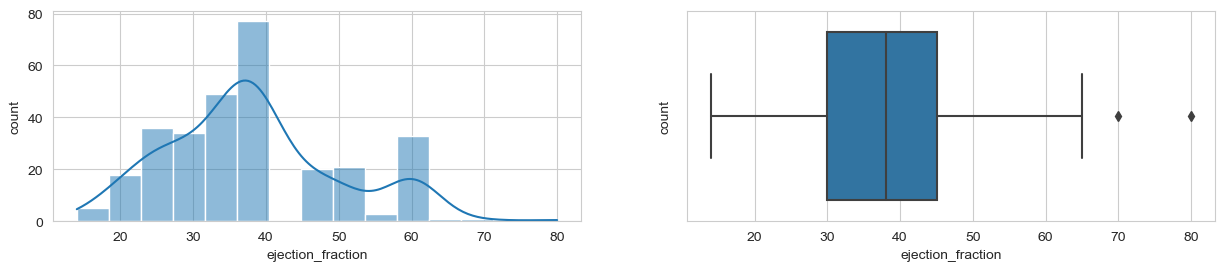

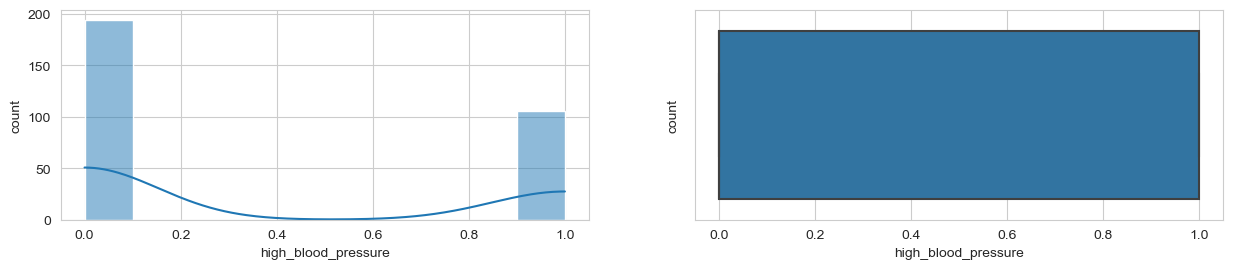

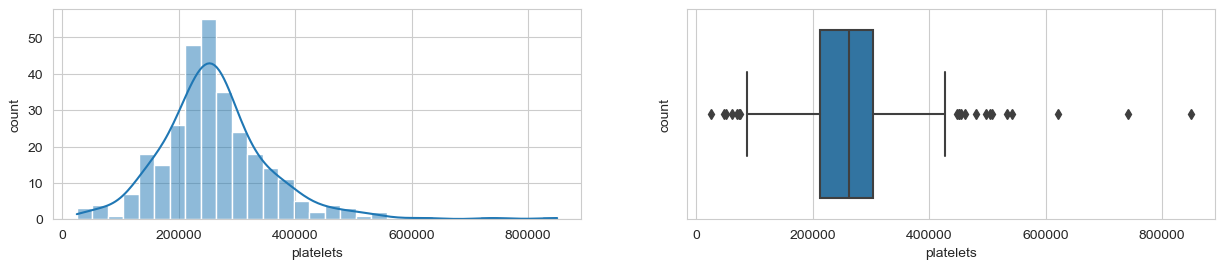

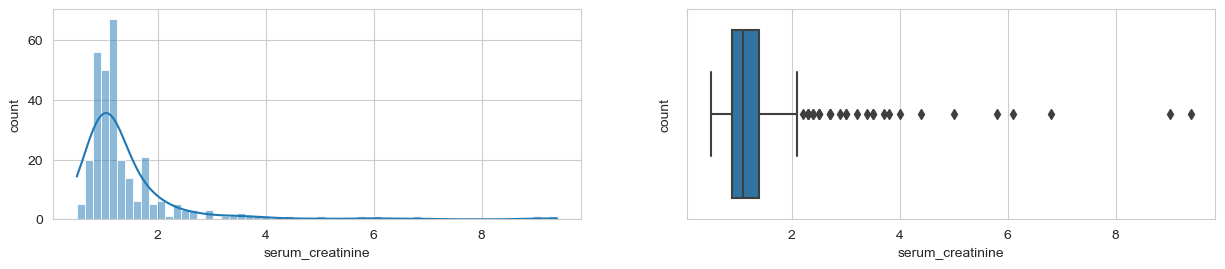

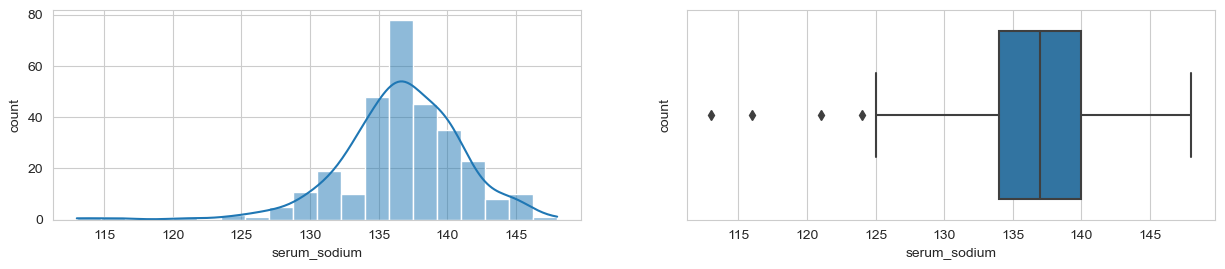

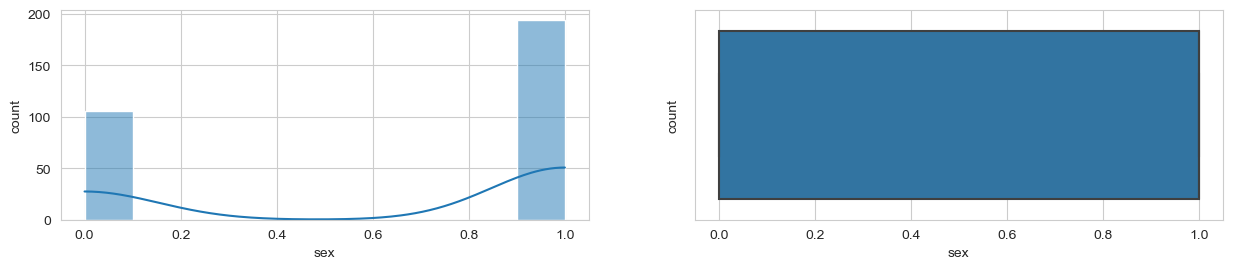

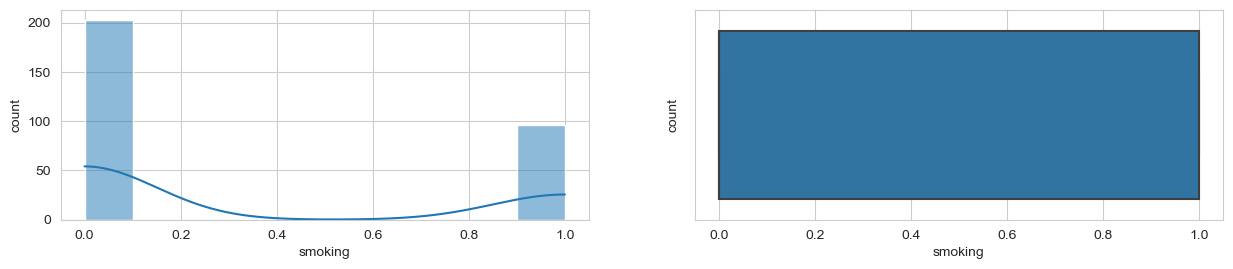

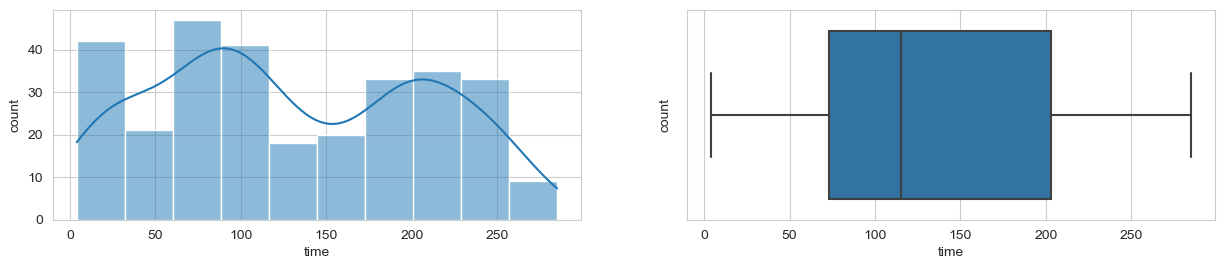

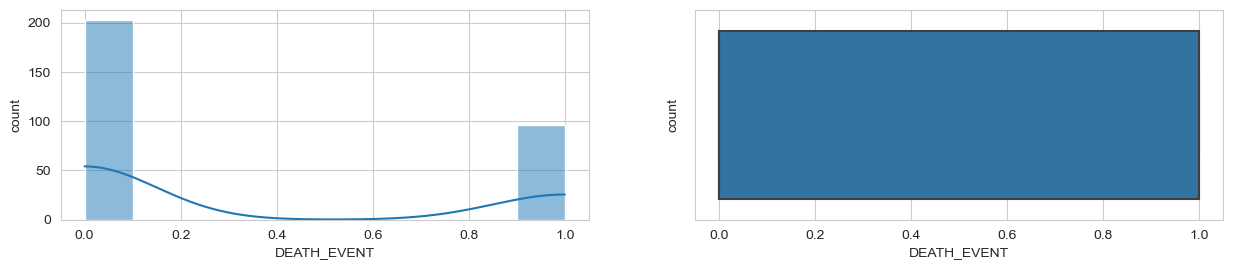

In [19]:
# menampilkan grafik distribusi untuk setiap kolom pada dataset

features = data.columns.tolist()

for feature in features:
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('count')

    plt.subplot(2, 2, 2)
    sns.boxplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

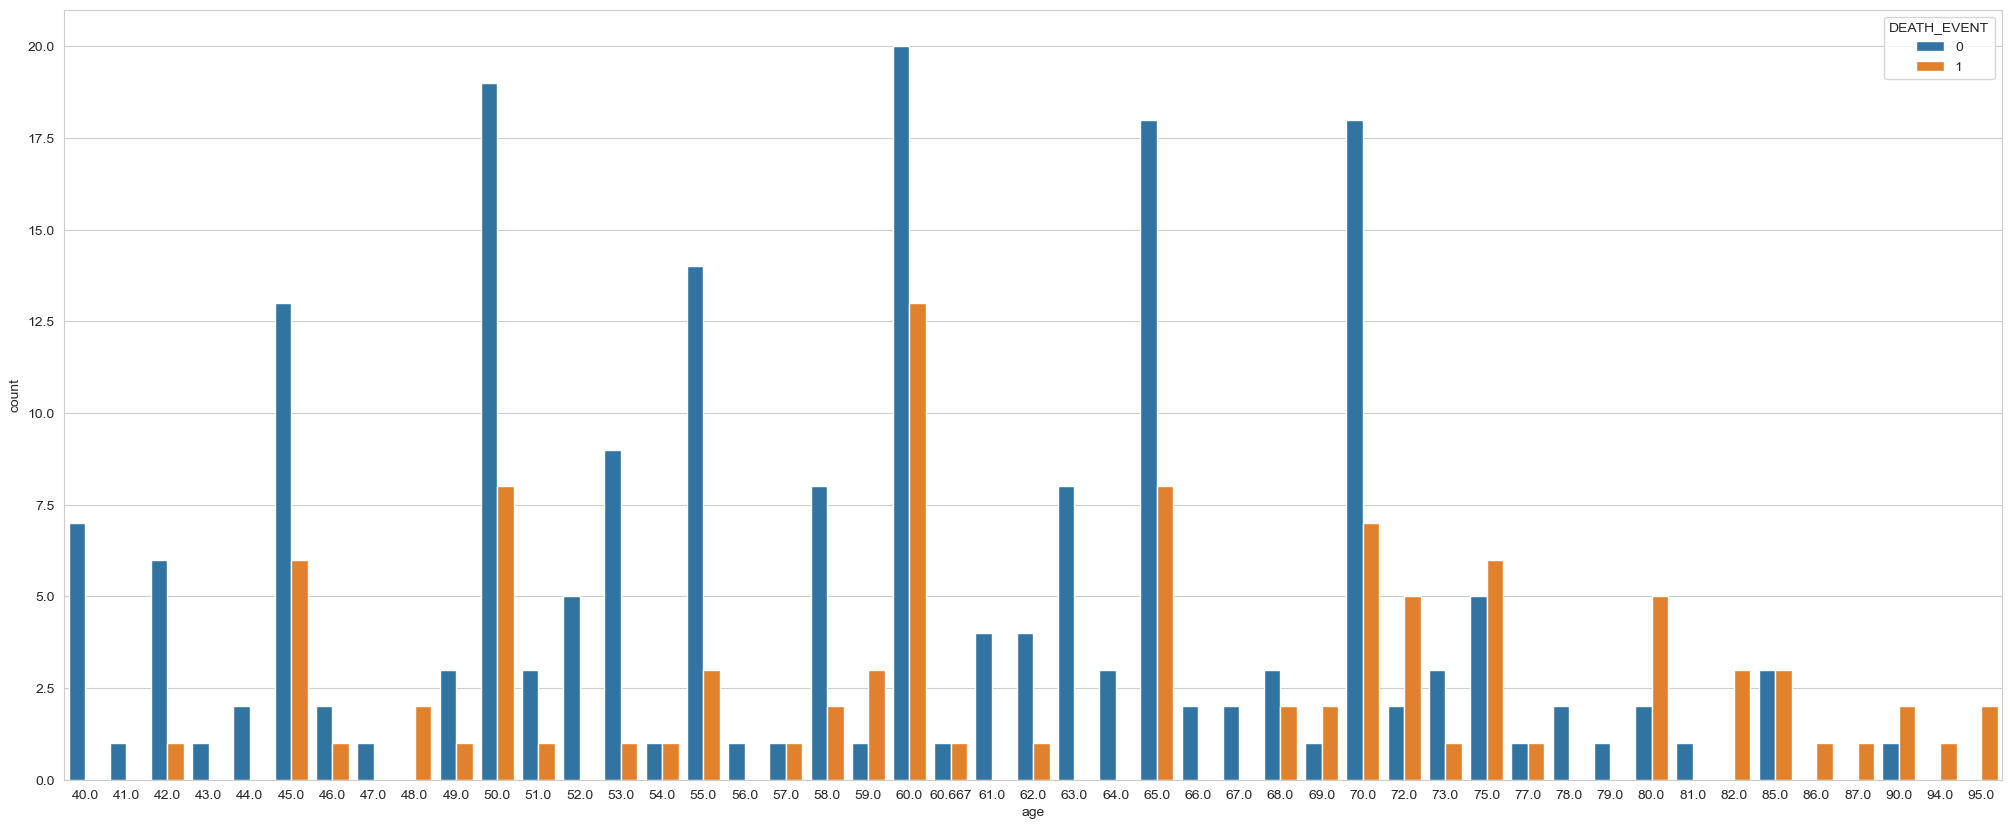

In [20]:
# menghitung jumlah distibusi umur dengan hue death_event

plt.figure(figsize=(25, 10))
sns.countplot(x='age', data=data, hue='DEATH_EVENT')
plt.show()

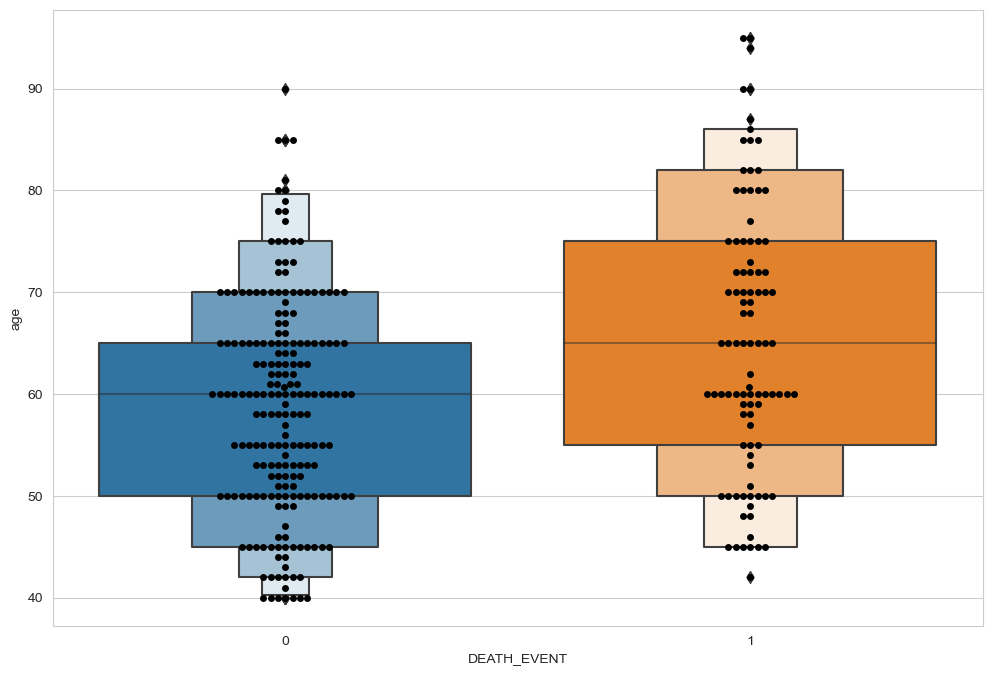

In [21]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x=data['DEATH_EVENT'], y=data['age'], color='black')
sns.boxenplot(x=data['DEATH_EVENT'], y=data['age'])
plt.show()

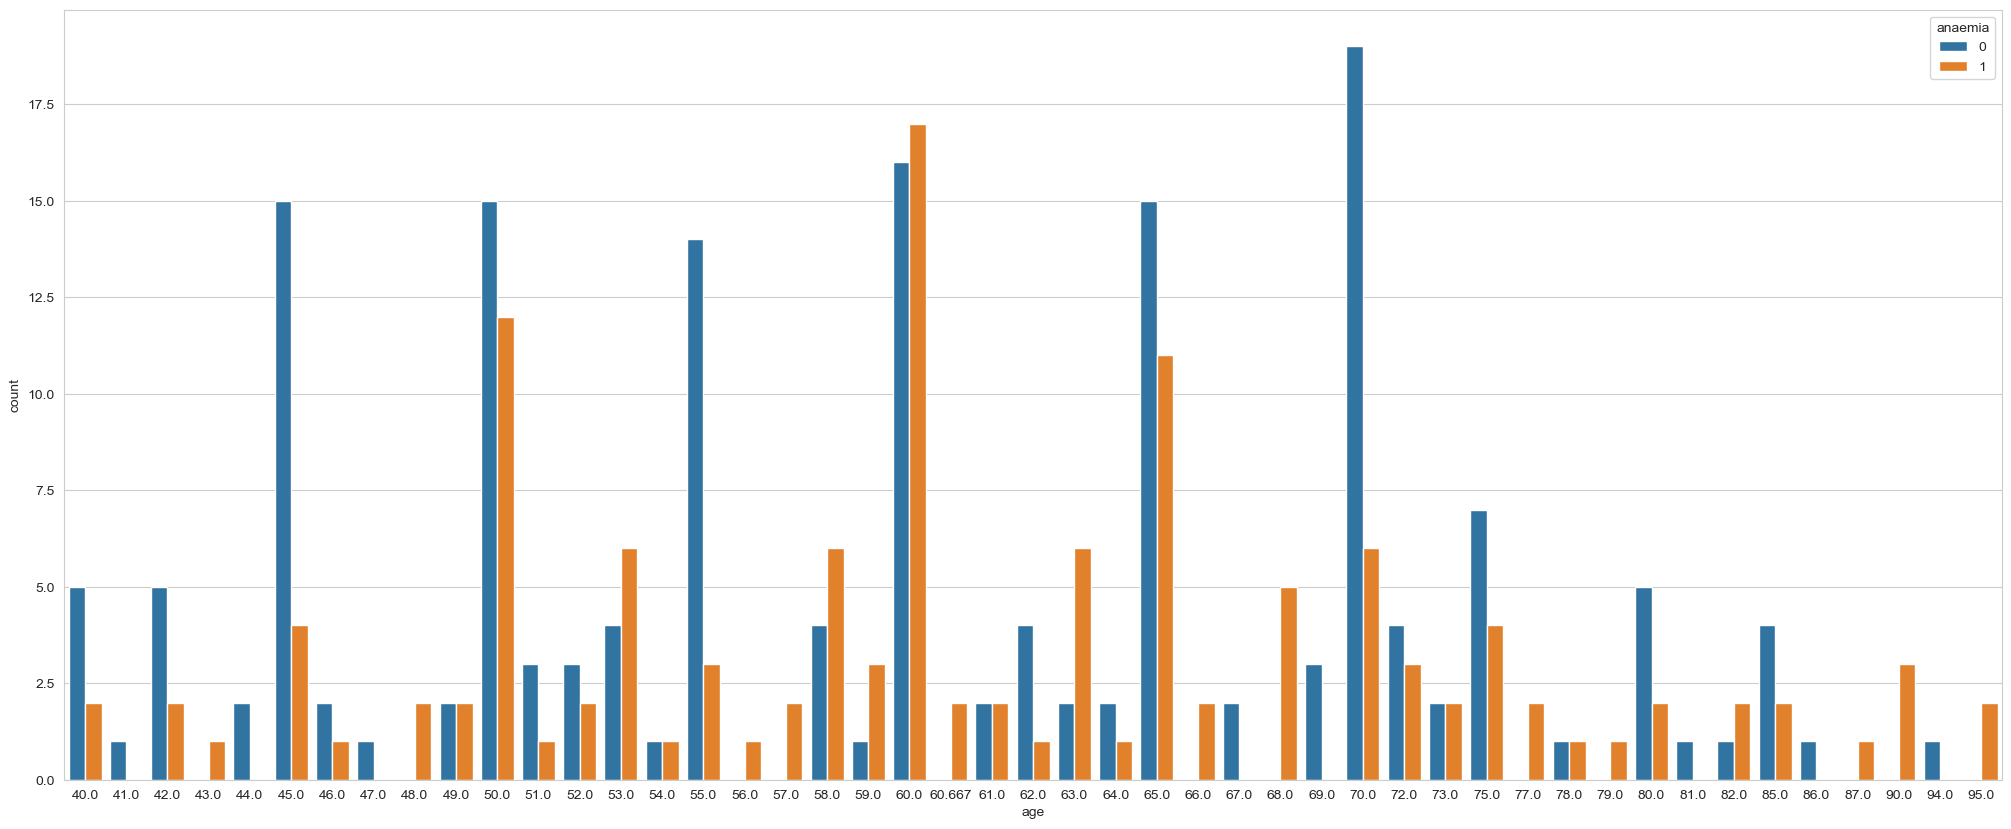

In [22]:
# menghitung jumlah distibusi umur dengan hue anaemia

plt.figure(figsize=(25, 10))
sns.countplot(x='age', data=data, hue='anaemia')
plt.show()

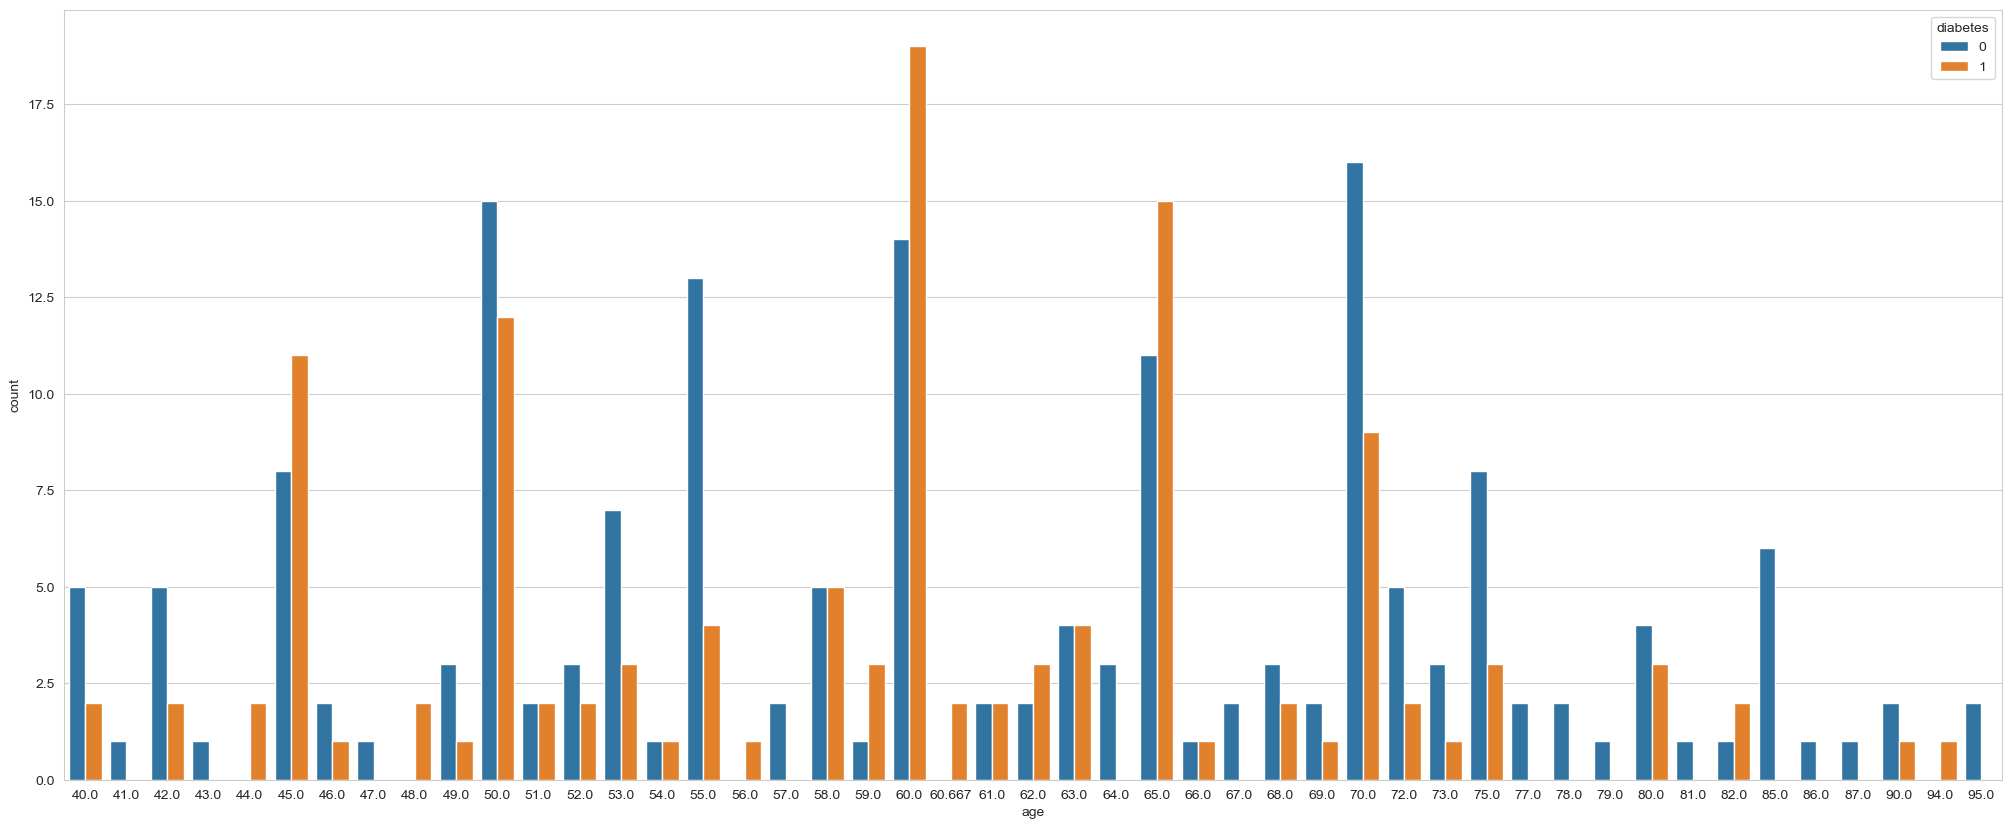

In [23]:
# menghitung jumlah distibusi umur dengan hue diabetas

plt.figure(figsize=(25, 10))
sns.countplot(x='age', data=data, hue='diabetes')
plt.show()

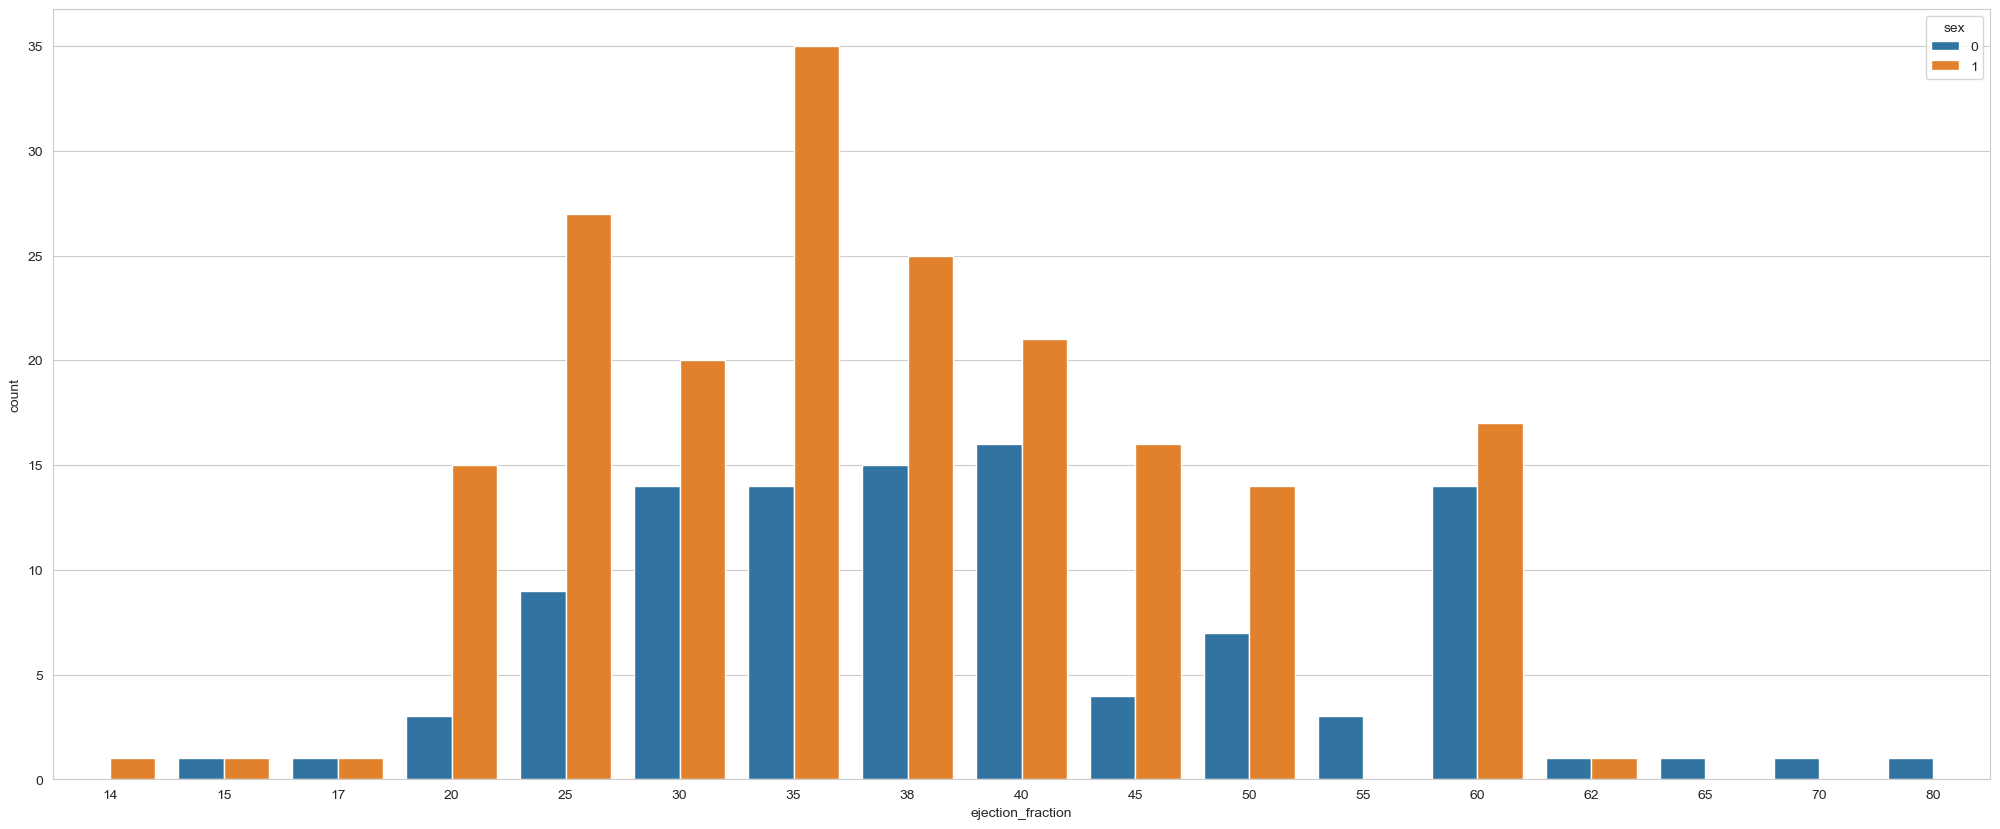

In [24]:
# menghitung jumlah distibusi ejection fraction dengan hue sex

plt.figure(figsize=(25, 10))
sns.countplot(x='ejection_fraction', data=data, hue='sex')
plt.show()

In [16]:
# distribusi lebih lanjut antara ejection_fraction dengan death_event

fig = px.histogram(data, x="ejection_fraction", color='DEATH_EVENT', marginal="violin", hover_data=data.columns, title="Distribution of ejection fraction and death event")
fig.show()

In [17]:
# distribusi lebih lanjut antara time dengan death_event

fig = px.histogram(data, x="time", color='DEATH_EVENT', marginal="violin", hover_data=data.columns, title="Distribution of time and death event")
fig.show()

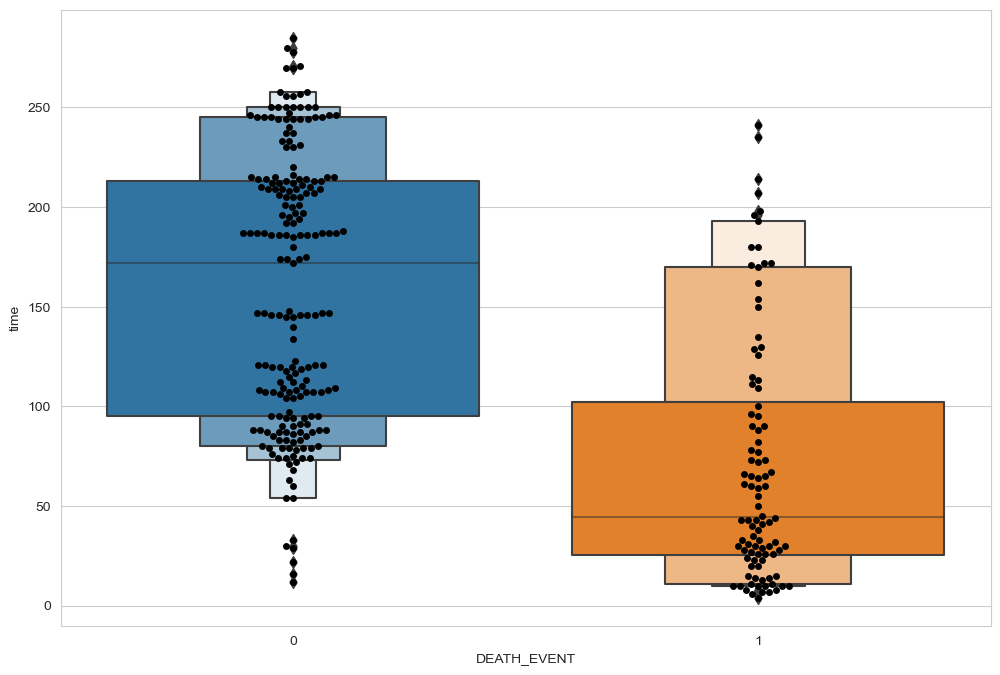

In [27]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x=data['DEATH_EVENT'], y=data['time'], color='black')
sns.boxenplot(x=data['DEATH_EVENT'], y=data['time'])
plt.show()

In [28]:
# distribusi lebih lanjut antara time dengan death_event

fig = px.histogram(data, x="serum_creatinine", color='DEATH_EVENT', marginal="violin", hover_data=data.columns, title="Distribution of serum creatinine and death event")
fig.show()

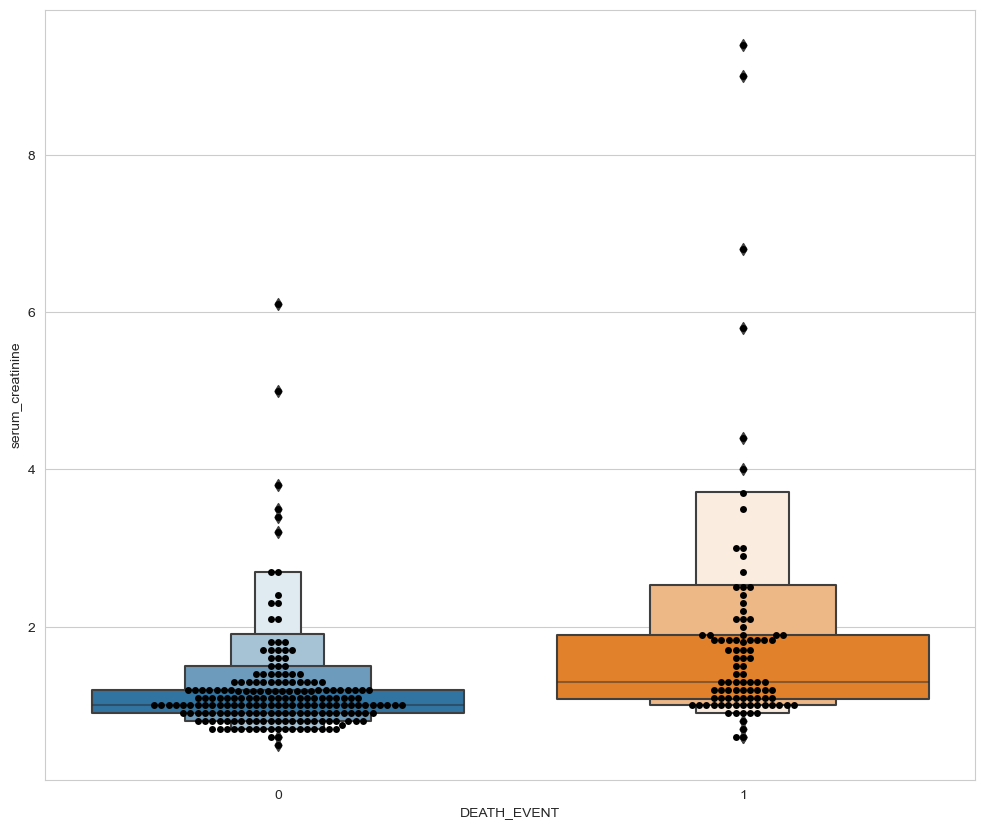

In [29]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x=data['DEATH_EVENT'], y=data['serum_creatinine'], color='black')
sns.boxenplot(x=data['DEATH_EVENT'], y=data['serum_creatinine'])
plt.show()

In [30]:
# distribusi lebih lanjut antara serum sodium dengan death_event

fig = px.histogram(data, x="serum_sodium", color='DEATH_EVENT', marginal="violin", hover_data=data.columns, title="Distribution of serum sodium and death event")
fig.show()

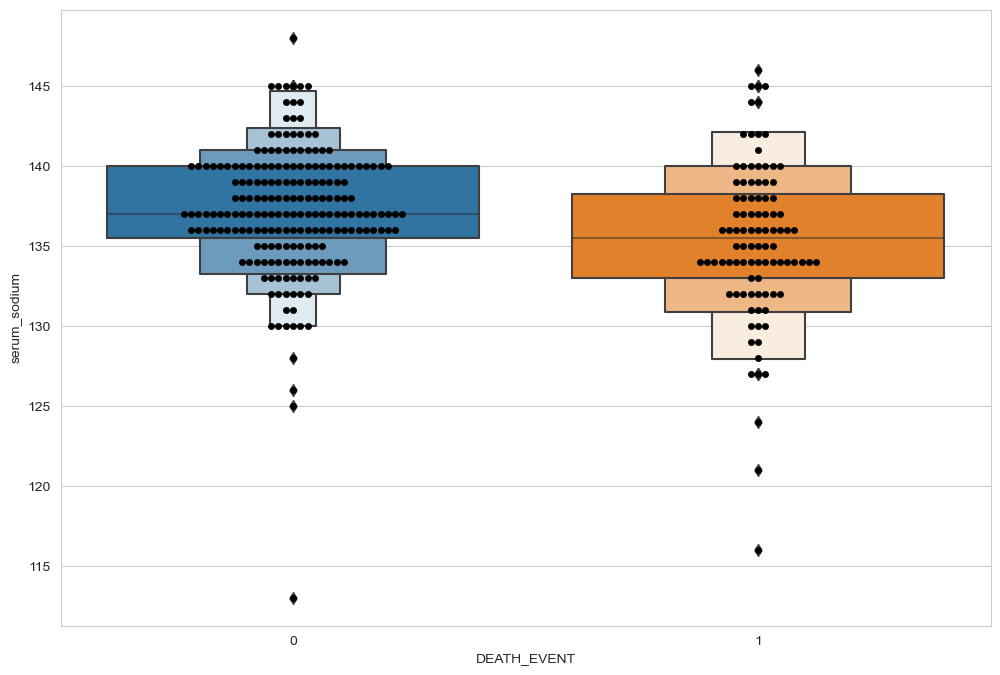

In [31]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x=data['DEATH_EVENT'], y=data['serum_sodium'], color='black')
sns.boxenplot(x=data['DEATH_EVENT'], y=data['serum_sodium'])
plt.show()

<Axes: xlabel='age', ylabel='platelets'>

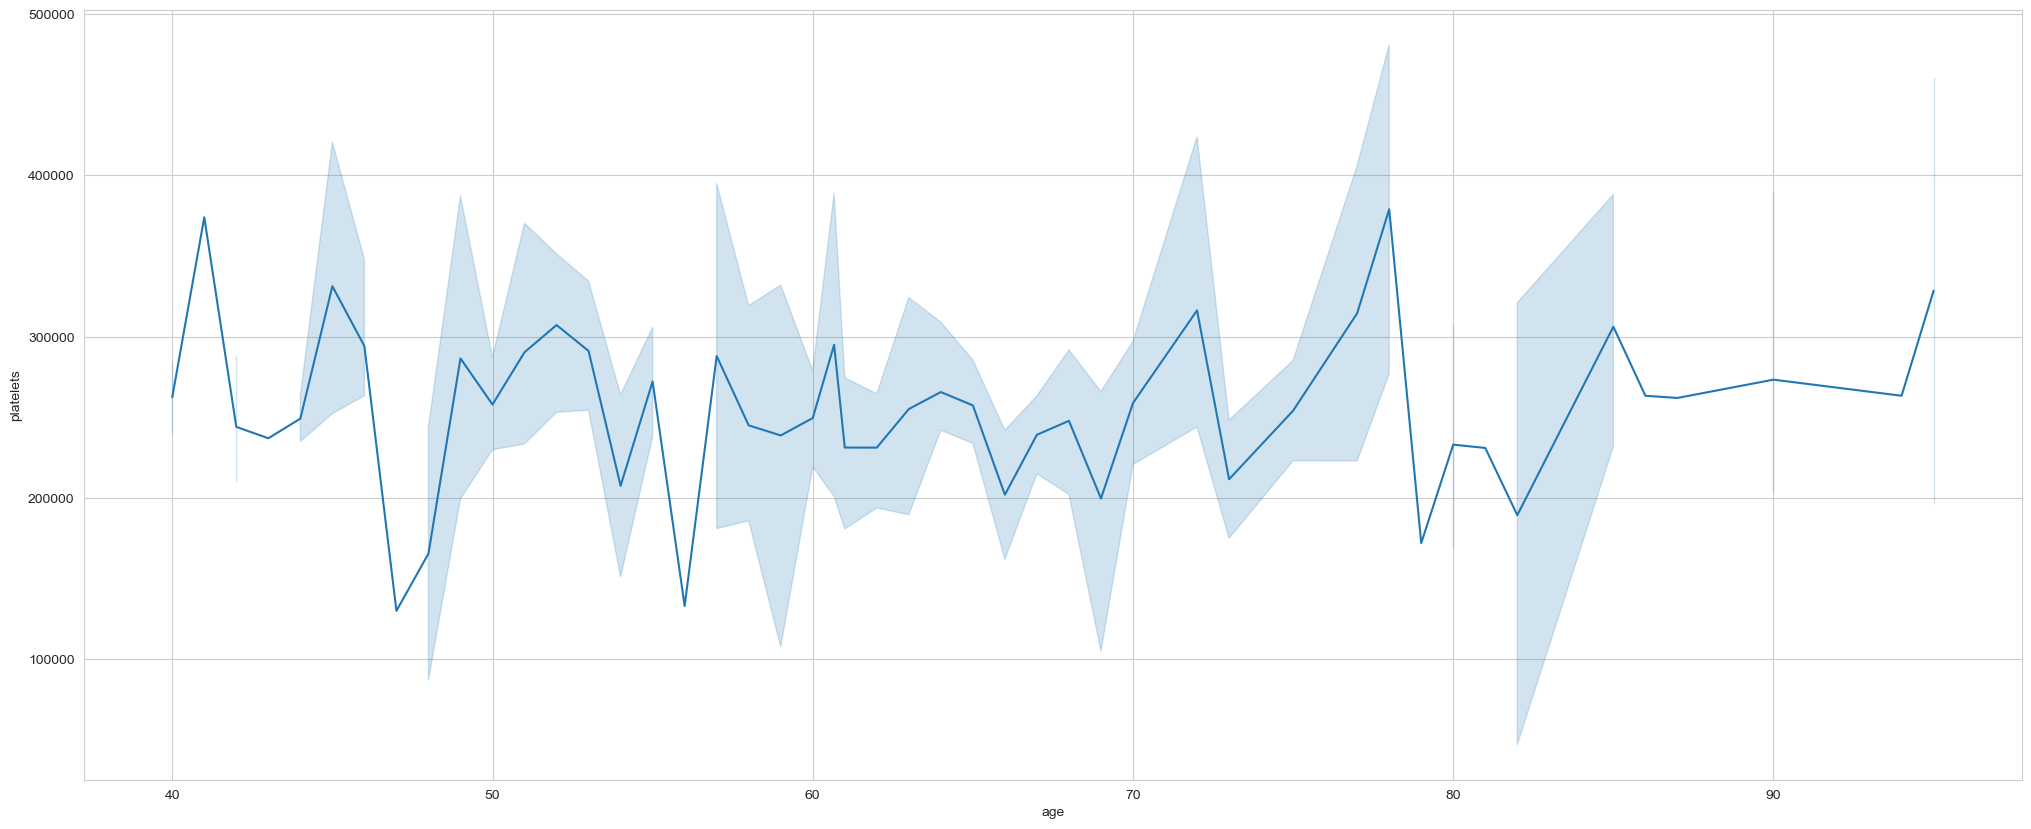

In [32]:
# mengetahui bentuk garis antara age dengan platelets

plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x="age", y="platelets", markers=True)

<Axes: xlabel='age', ylabel='time'>

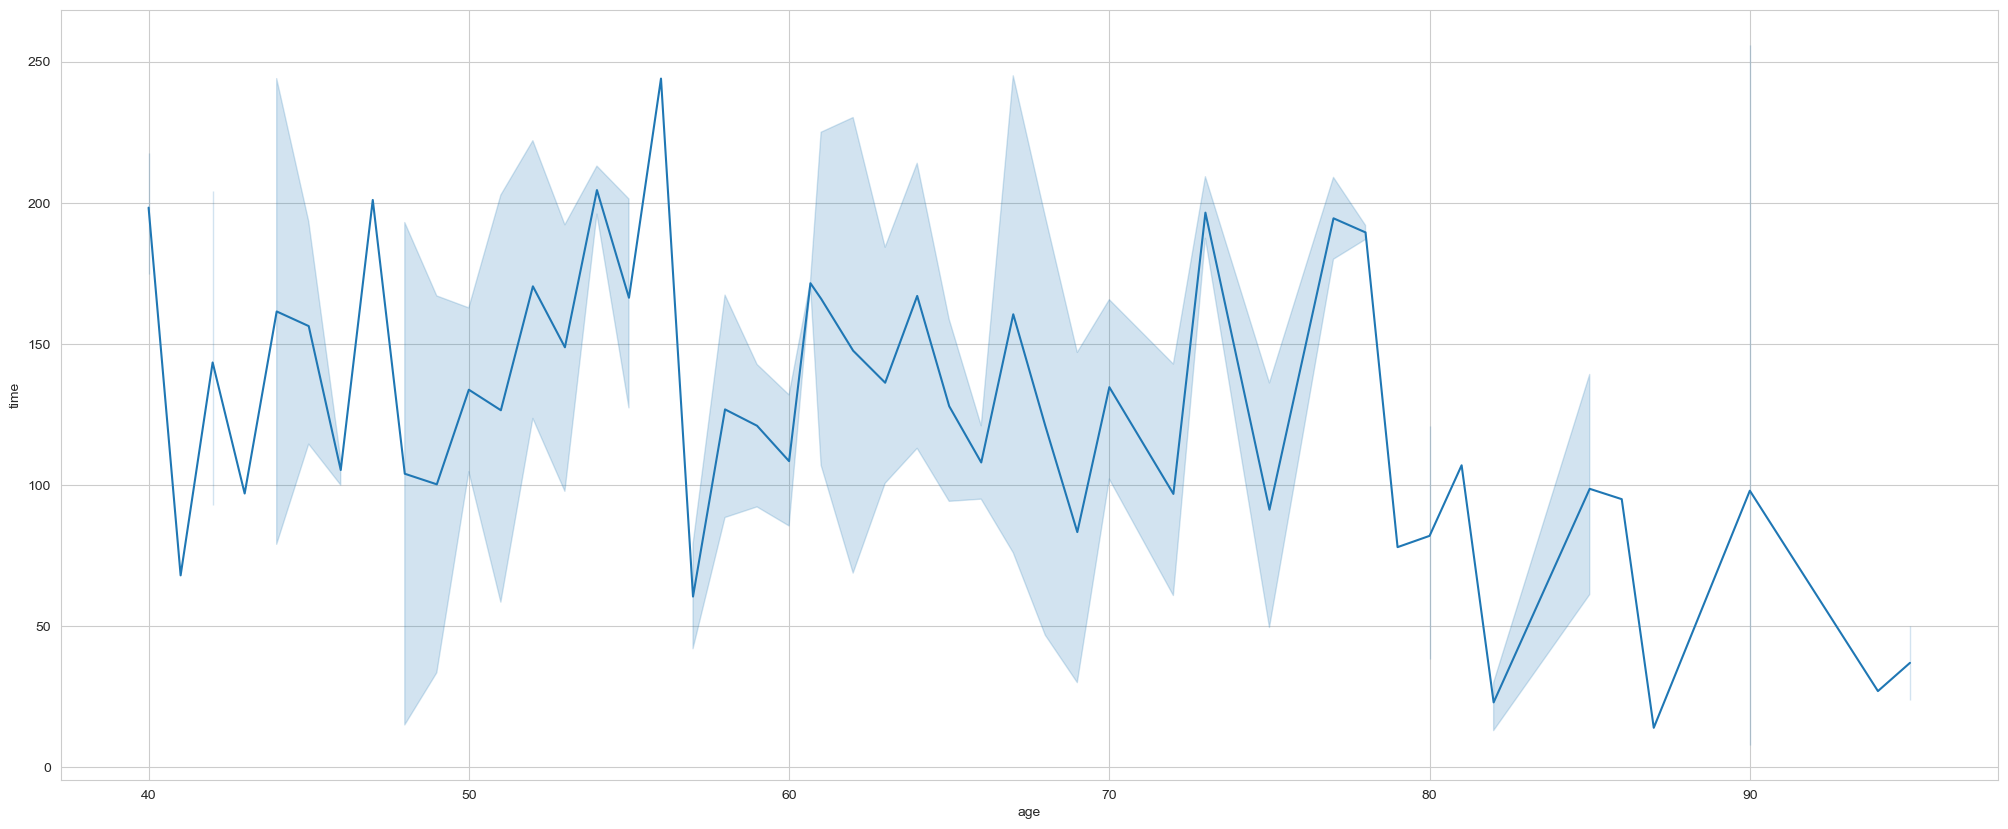

In [33]:
# mengetahui bentuk garis antara age dengan time

plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x="age", y="time", markers=True)

In [34]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

In [35]:
features =X.columns.tolist()
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=features)
X_scaled

age   anaemia  creatinine_phosphokinase  diabetes  \
0    1.192945 -0.871105                  0.000166 -0.847579   
1   -0.491279 -0.871105                  7.514640 -0.847579   
2    0.350833 -0.871105                 -0.449939 -0.847579   
3   -0.912335  1.147968                 -0.486071 -0.847579   
4    0.350833  1.147968                 -0.435486  1.179830   
..        ...       ...                       ...       ...   
294  0.098199 -0.871105                 -0.537688  1.179830   
295 -0.491279 -0.871105                  1.278215 -0.847579   
296 -1.333392 -0.871105                  1.525979  1.179830   
297 -1.333392 -0.871105                  1.890398 -0.847579   
298 -0.912335 -0.871105                 -0.398321 -0.847579   

     ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0            -1.530560             1.359272  1.681648e-02          0.490057   
1            -0.007077            -0.735688  7.535660e-09         -0.284552   
2            -1.530560            -0.735688 -1.038073e+00         -0.090900   
3            -1.530560            -0.735688 -5.464741e-01          0.490057   
4            -1.530560            -0.735688  6.517986e-01          1.264666   
..                 ...                  ...           ...               ...   
294          -0.007077             1.359272 -1.109765e+00         -0.284552   
295          -0.007077            -0.735688  6.802472e-02         -0.187726   
296           1.854958            -0.735688  4.902082e+00         -0.575031   
297          -0.007077            -0.735688 -1.263389e+00          0.005926   
298           0.585389            -0.735688  1.348231e+00          0.199578   

     serum_sodium       sex   smoking      time  
0       -1.504036  0.735688 -0.687682 -1.629502  
1       -0.141976  0.735688 -0.687682 -1.603691  
2       -1.731046  0.735688  1.454161 -1.590785  
3        0.085034  0.735688 -0.687682 -1.590785  
4       -4.682176 -1.359272 -0.687682 -1.577879  
..            ...       ...       ...       ...  
294      1.447094  0.735688  1.454161  1.803451  
295      0.539054 -1.359272 -0.687682  1.816357  
296      0.312044 -1.359272 -0.687682  1.906697  
297      0.766064  0.735688  1.454161  1.932509  
298     -0.141976  0.735688  1.454161  1.997038  

[299 rows x 12 columns]

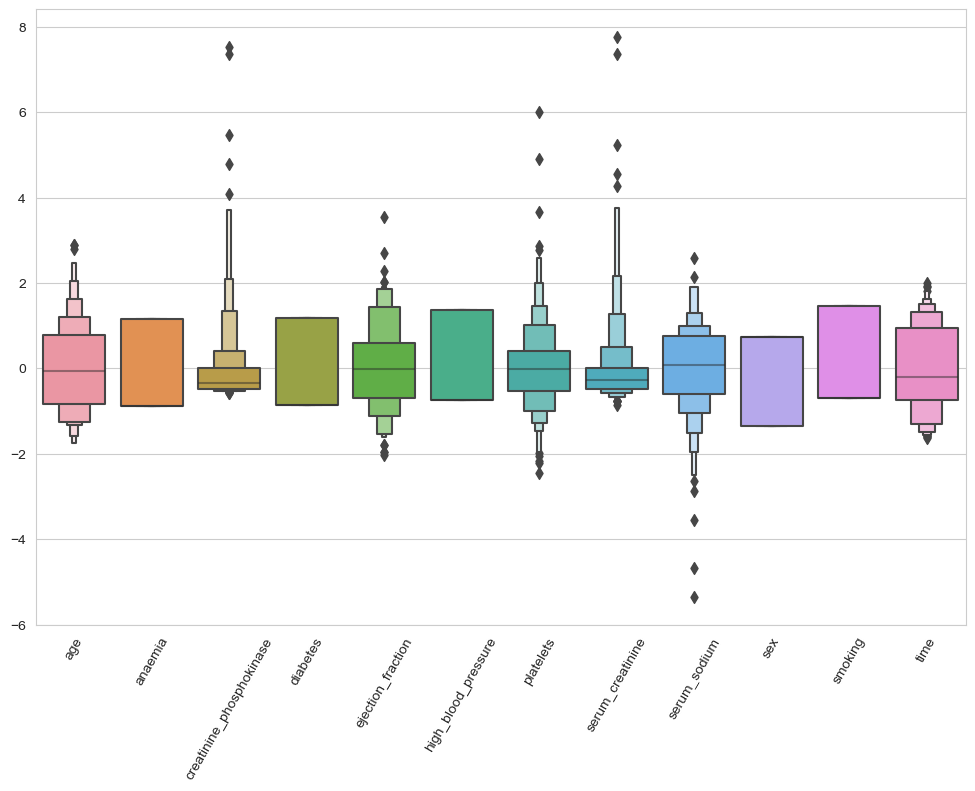

In [36]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation=60)
plt.show()

<Axes: xlabel='ejection_fraction', ylabel='creatinine_phosphokinase'>

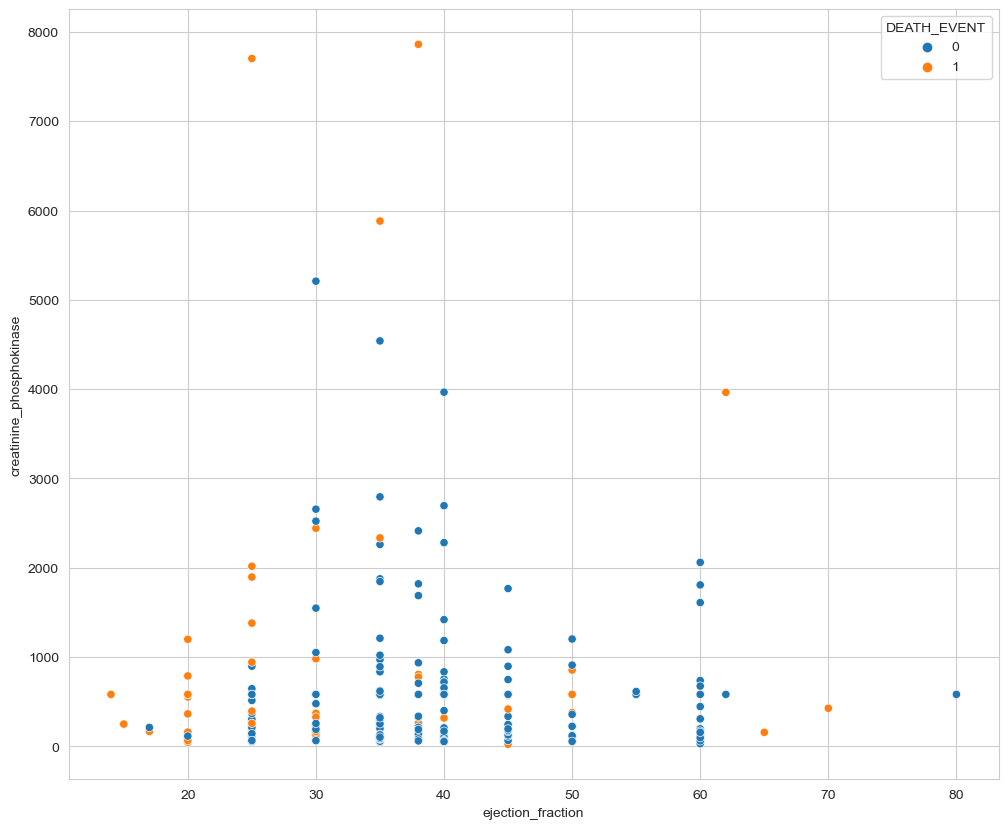

In [37]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, y="creatinine_phosphokinase", x="ejection_fraction", hue="DEATH_EVENT")

<Axes: xlabel='serum_sodium', ylabel='serum_creatinine'>

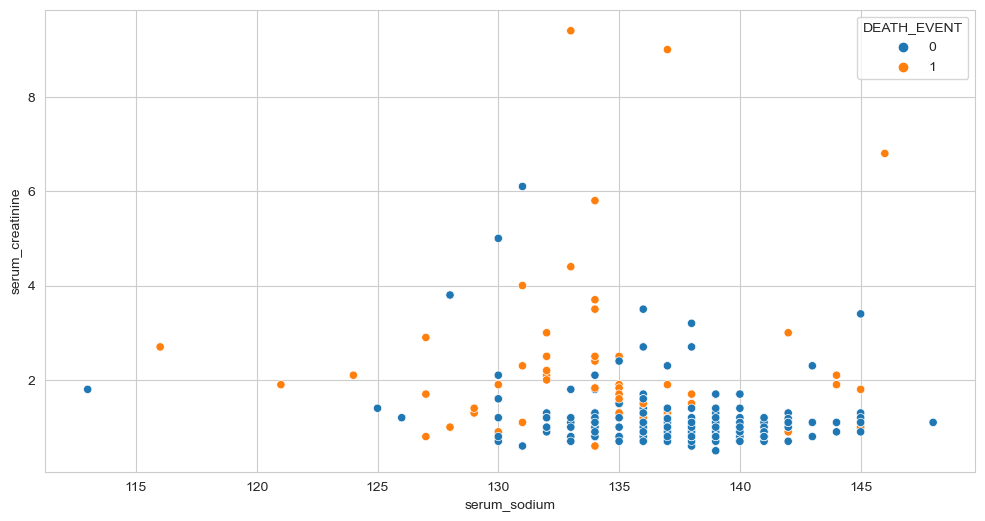

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, y="serum_creatinine", x="serum_sodium", hue='DEATH_EVENT')

<Axes: xlabel='age', ylabel='time'>

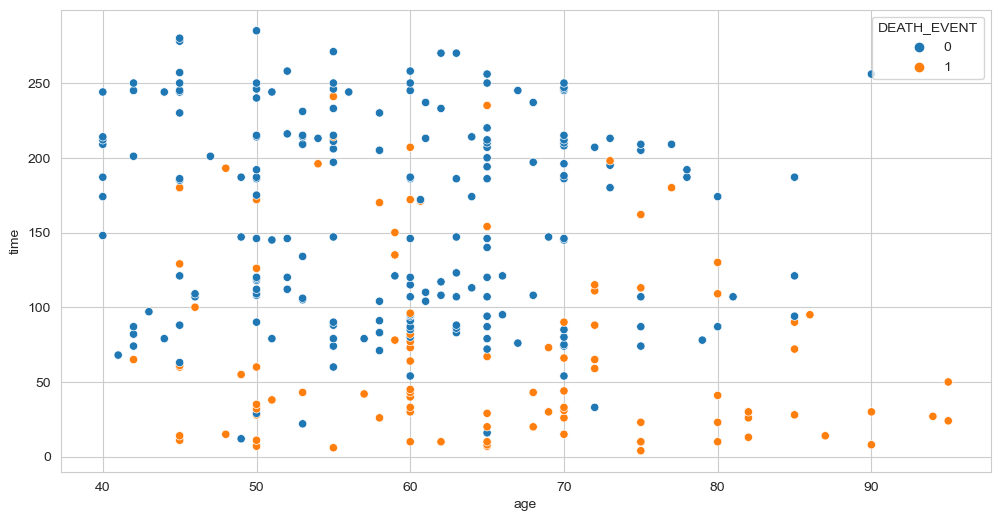

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="age", y="time", hue='DEATH_EVENT')

<Axes: xlabel='age', ylabel='ejection_fraction'>

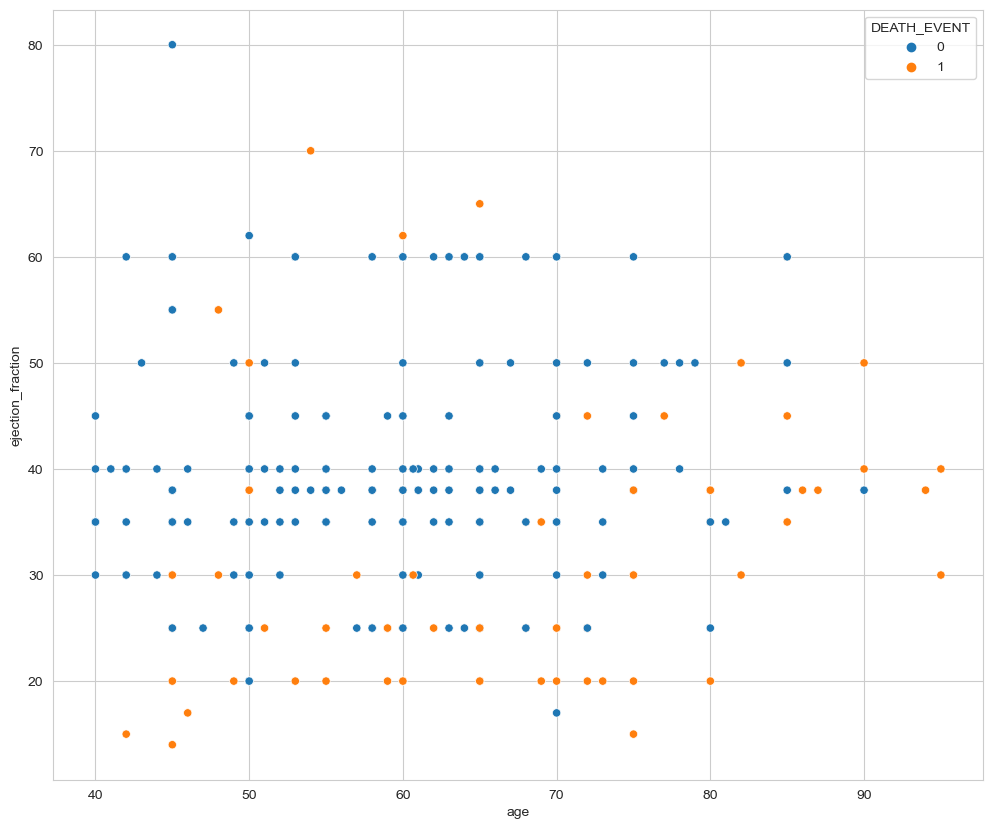

In [40]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, x="age", y="ejection_fraction", hue='DEATH_EVENT')

<Axes: xlabel='ejection_fraction', ylabel='serum_sodium'>

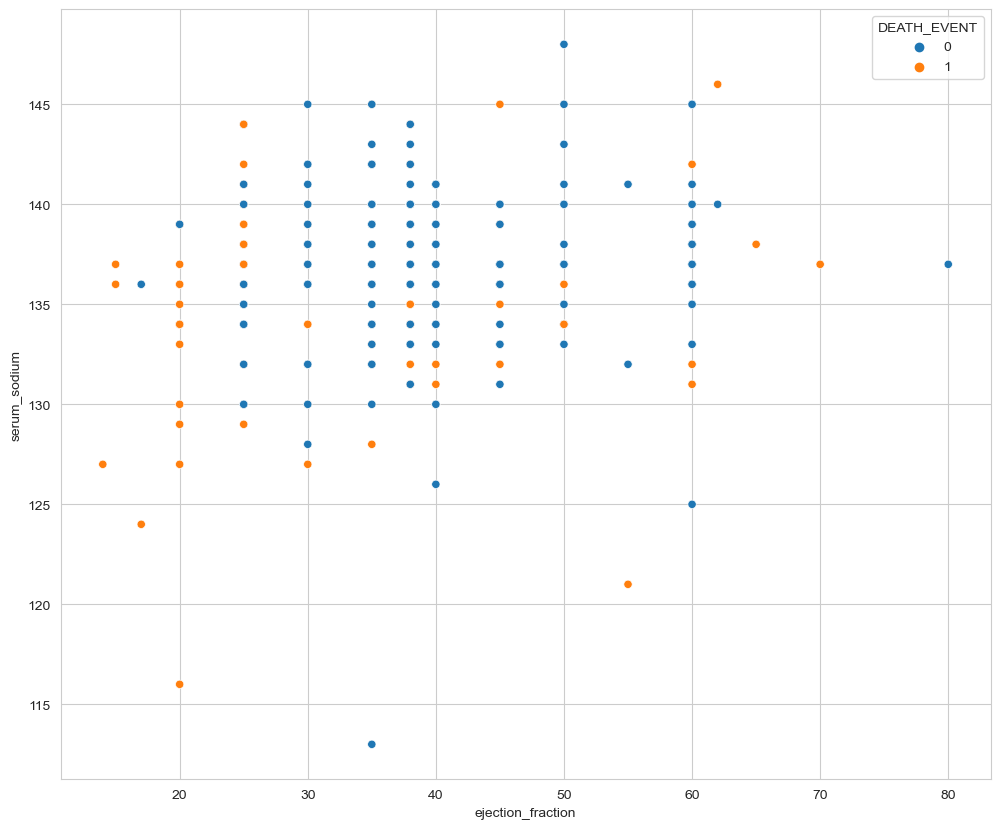

In [15]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, y="serum_sodium", x="ejection_fraction", hue='DEATH_EVENT')